In [1]:
#Import libraries 
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
# Now let’s read the data
candies=pd.read_csv("candy_production.csv")

Let’s make a copy of data so that even if we do changes in these dataset we do not lose the original dataset.

In [3]:
candies_original=candies.copy()

let’s have a look at the features in the dataset.

In [4]:
candies.columns

Index(['observation_date', 'IPG3113N'], dtype='object')

Let’s look at the data types of each feature.

In [5]:
candies.dtypes

observation_date     object
IPG3113N            float64
dtype: object

See the shape of the dataset.

In [6]:
candies.shape

(548, 2)

In [7]:
candies.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [8]:
candies.tail()

,observation_date,IPG3113N
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861
547,2017-08-01,114.0613


Feature Extraction

In [9]:
candies['observation_date'] = pd.to_datetime(candies.observation_date,format='%Y-%m-%d')  
candies_original['observation_date'] = pd.to_datetime(candies_original.observation_date,format='%Y-%m-%d')

In [10]:
#  let’s extract the year, month and day from the observation_date
for i in (candies,candies_original):
    i['year']=i.observation_date.dt.year 
    i['month']=i.observation_date.dt.month 
    i['day']=i.observation_date.dt.day

In [11]:
candies.head()

,observation_date,IPG3113N,year,month,day
0,1972-01-01,85.6945,1972,1,1
1,1972-02-01,71.8200,1972,2,1
2,1972-03-01,66.0229,1972,3,1
3,1972-04-01,64.5645,1972,4,1
4,1972-05-01,65.0100,1972,5,1


EDA - Plots (trend? seasonality?)

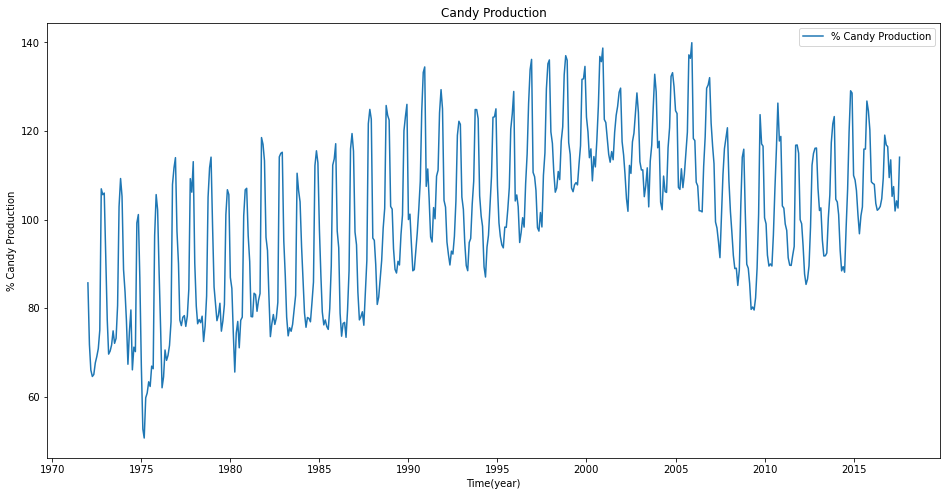

In [12]:
candies.index = candies['observation_date'] # indexing the Datetime to get the time period on the x-axis.
ts = candies['IPG3113N']
plt.figure(figsize=(16,8))
plt.plot(ts, label='% Candy Production')
plt.title('Candy Production')
plt.xlabel("Time(year)")
plt.ylabel("% Candy Production")
plt.legend(loc='best')

<AxesSubplot:xlabel='year'>

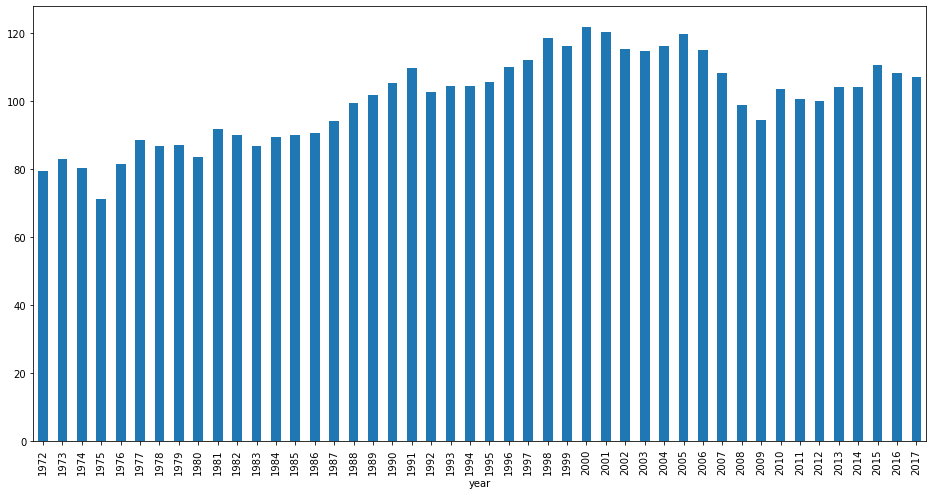

In [13]:
# let’s look at yearly production count.
plt.figure(figsize=(16,8))
candies.groupby('year')['IPG3113N'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

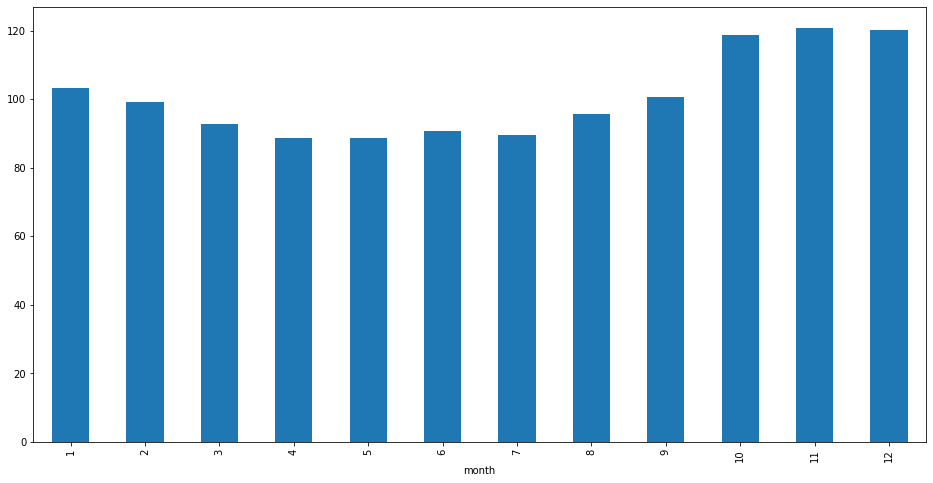

In [14]:
# let’s look at monthly production count.
plt.figure(figsize=(16,8))
candies.groupby('month')['IPG3113N'].mean().plot.bar()

<AxesSubplot:title={'center':'production Count(Monthwise)'}, xlabel='year,month'>

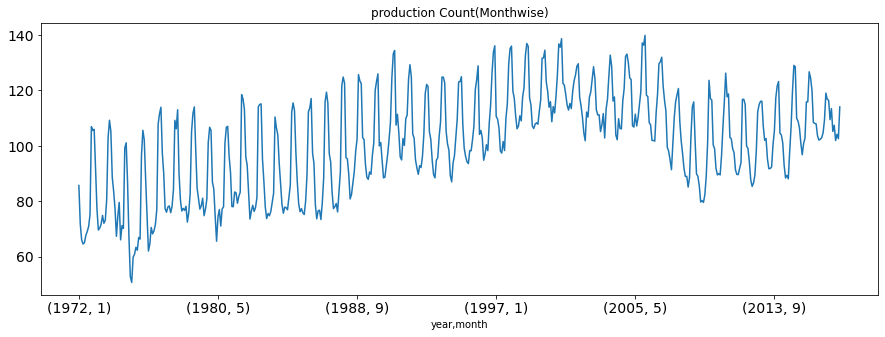

In [15]:
# Let’s look at the monthly mean of each year separately.

temp=candies.groupby(['year','month'])['IPG3113N'].mean()
temp.plot(figsize=(15,5), title= 'production Count(Monthwise)', fontsize=14)

Splitting the data into training and validation part

In [16]:
train=candies[:'2011-10-01']
valid=candies['2011-11-01':]

In [17]:
train.head()

,observation_date,IPG3113N,year,month,day
observation_date,,,,,
1972-01-01,1972-01-01,85.6945,1972,1,1
1972-02-01,1972-02-01,71.8200,1972,2,1
1972-03-01,1972-03-01,66.0229,1972,3,1
1972-04-01,1972-04-01,64.5645,1972,4,1
1972-05-01,1972-05-01,65.0100,1972,5,1


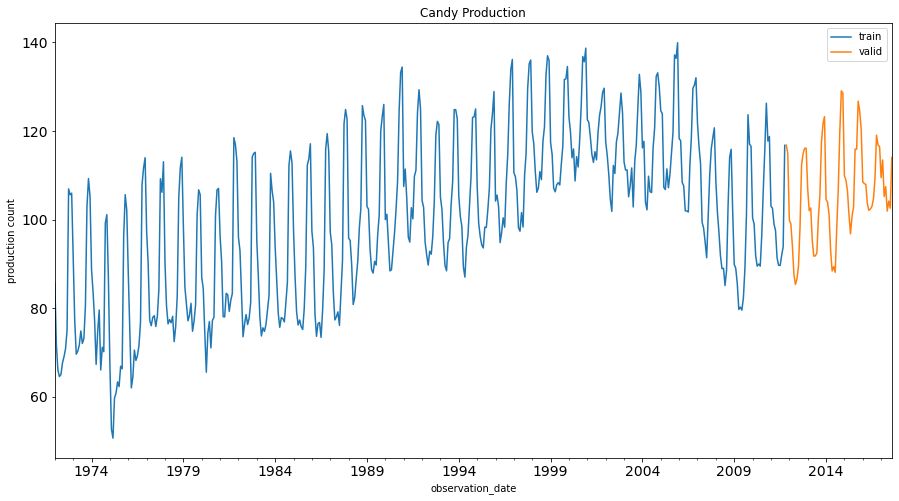

In [18]:
train.IPG3113N.plot(figsize=(15,8), title= 'Candy Production', fontsize=14, label='train')
valid.IPG3113N.plot(figsize=(15,8), title= 'Candy Production', fontsize=14, label='valid')
plt.xlabel("observation_date")
plt.ylabel("production count")
plt.legend(loc='best')
plt.show()

Simple models: Naive, Moving Average

Naive :-

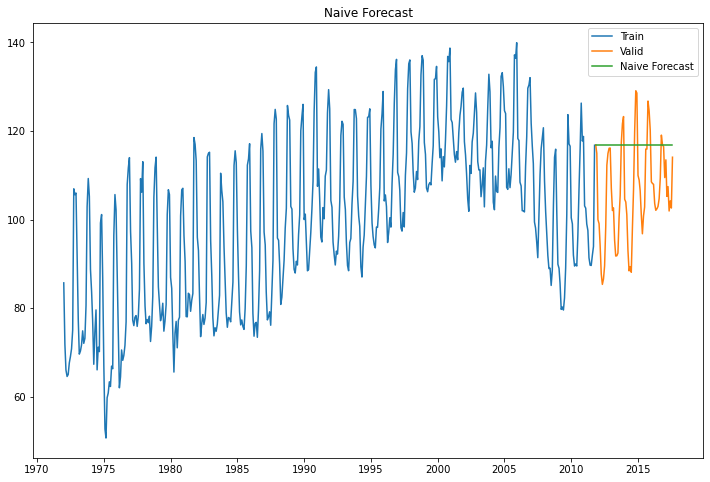

In [19]:
# predictions using naive approach for the validation set.
dd= np.asarray(train['IPG3113N'])
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['IPG3113N'], label='Train')
plt.plot(valid.index,valid['IPG3113N'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [20]:
# RMSE(Root Mean Square Error) to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid['IPG3113N'], y_hat.naive))
print(rms)

15.138677354351103


Moving Average :-

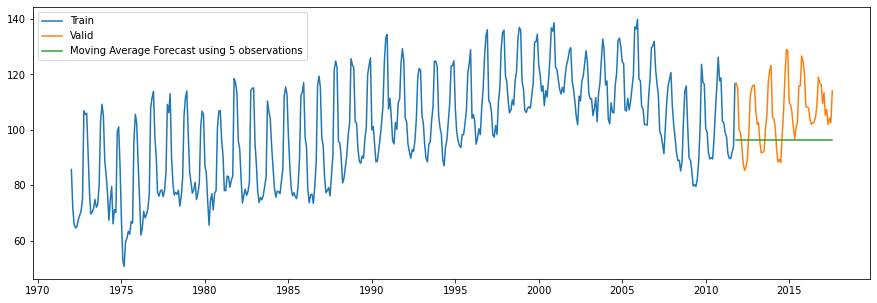

In [21]:
# last 5 observations.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = train['IPG3113N'].rolling(5).mean().iloc[-1] # average of last 5 observations.
plt.figure(figsize=(15,5)) 
plt.plot(train['IPG3113N'], label='Train')
plt.plot(valid['IPG3113N'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 5 observations')
plt.legend(loc='best')
plt.show()

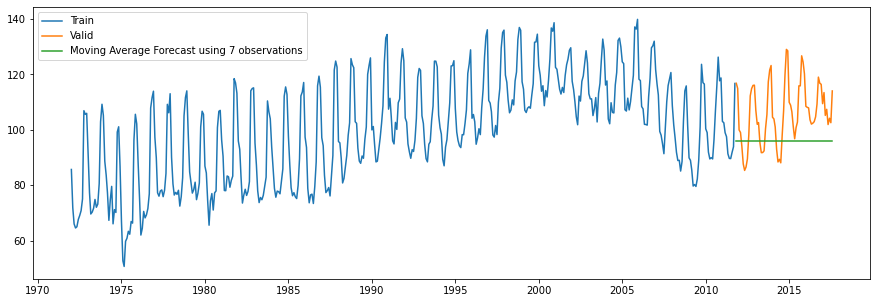

In [22]:
# last 7 observations.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = train['IPG3113N'].rolling(7).mean().iloc[-1] # average of last 7 observations.
plt.figure(figsize=(15,5)) 
plt.plot(train['IPG3113N'], label='Train')
plt.plot(valid['IPG3113N'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 7 observations')
plt.legend(loc='best')
plt.show()

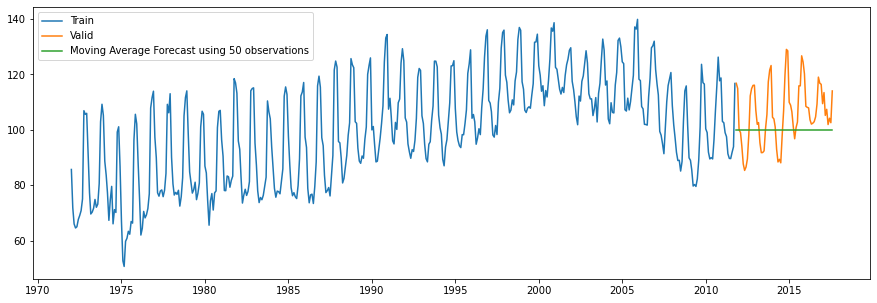

In [23]:
# last 50 observations.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = train['IPG3113N'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5)) 
plt.plot(train['IPG3113N'], label='Train')
plt.plot(valid['IPG3113N'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [24]:
rms = sqrt(mean_squared_error(valid['IPG3113N'], y_hat_avg.moving_avg_forecast))
print(rms)

12.275573480688617


Considering validate set, the Moving Average method showed better performance at some important metrics like RMSE and MAPE

Exponential models: Ses, Holt, Holt Winters

Simple Exponential Smoothing :-

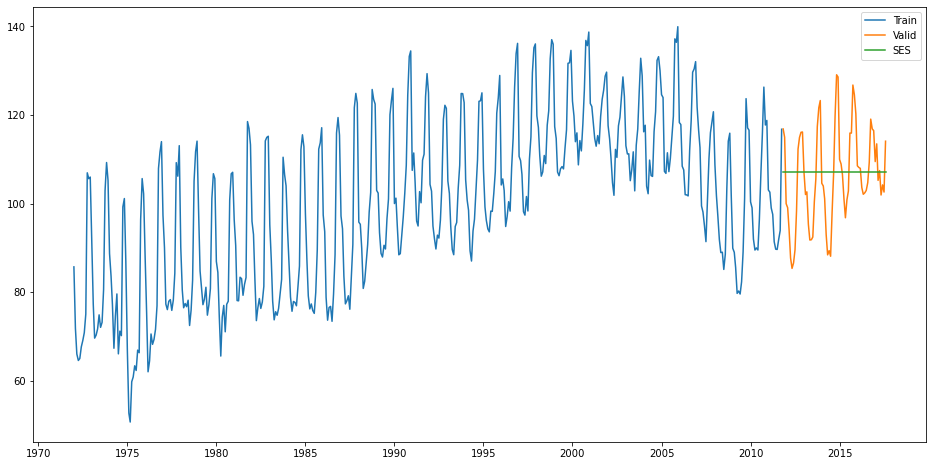

In [25]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_ex = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['IPG3113N'])).fit(smoothing_level=0.6,optimized=False)
y_hat_ex['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(train['IPG3113N'], label='Train')
plt.plot(valid['IPG3113N'], label='Valid')
plt.plot(y_hat_ex['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [26]:
rms = sqrt(mean_squared_error(valid['IPG3113N'], y_hat_ex['SES']))
print(rms)

10.767428986653037


Holt’s Linear Trend Model :-

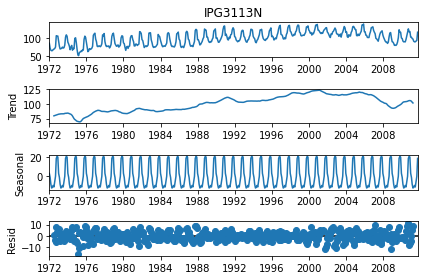

In [27]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['IPG3113N']).plot()
result = sm.tsa.stattools.adfuller(train['IPG3113N'])
plt.show()

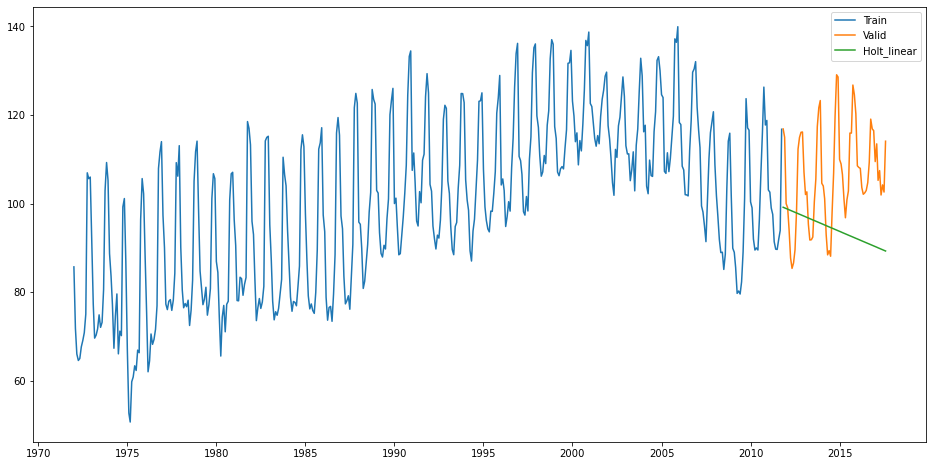

In [28]:
y_hat_ex = valid.copy()

fit1 = Holt(np.asarray(train['IPG3113N'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_ex['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(train['IPG3113N'], label='Train')
plt.plot(valid['IPG3113N'], label='Valid')
plt.plot(y_hat_ex['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [29]:
rms = sqrt(mean_squared_error(valid['IPG3113N'], y_hat_ex.Holt_linear))
print(rms)

16.777634682701624


Holt’s Winter method :-

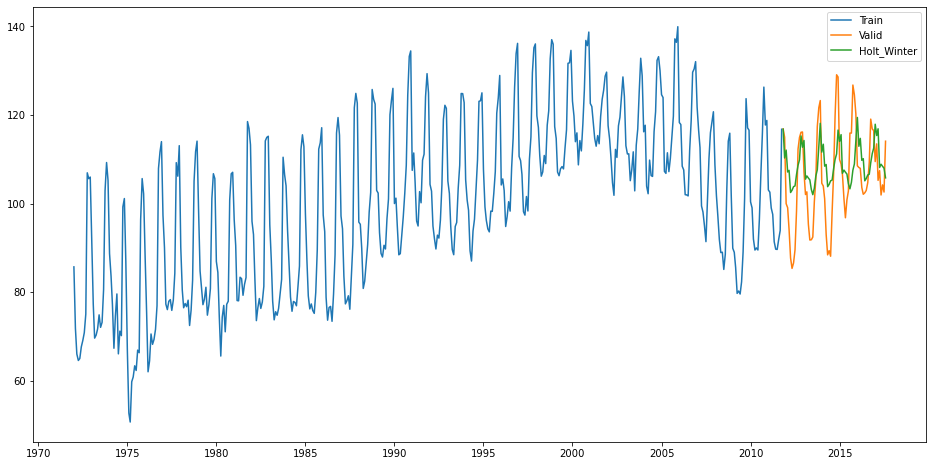

In [30]:
y_hat_win = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train['IPG3113N']) ,seasonal_periods=25 ,trend='add', seasonal='add',).fit()
y_hat_win['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( train['IPG3113N'], label='Train')
plt.plot(valid['IPG3113N'], label='Valid')
plt.plot(y_hat_win['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [31]:
rms = sqrt(mean_squared_error(valid['IPG3113N'], y_hat_win.Holt_Winter))
print(rms)

9.395006071118974


ARIMA

As our time series is non stationary, we have to apply differencing to reduce possibles trend and seasonality.

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

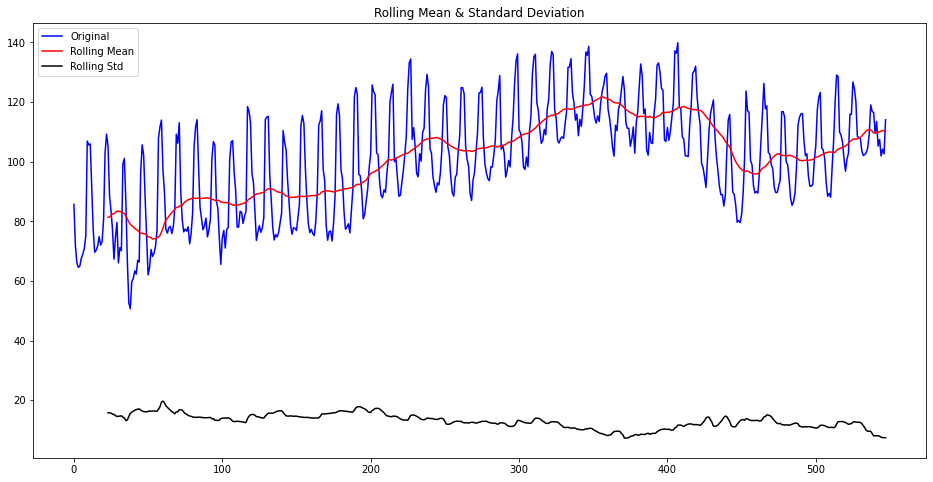

Results of Dickey-Fuller Test:
Test Statistic                  -1.887050
p-value                          0.338178
#Lags Used                      14.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64


In [33]:
plt.figure(figsize=(16,8))
test_stationarity(candies_original['IPG3113N'])

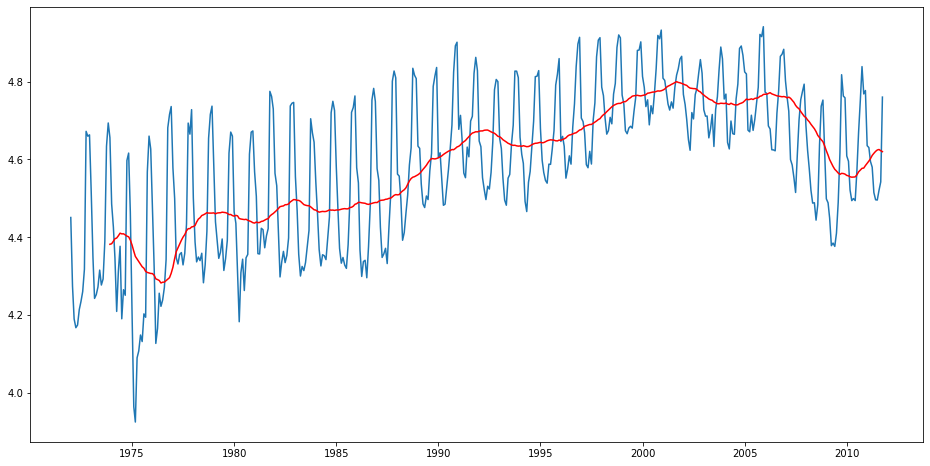

In [34]:
train_log = np.log(train['IPG3113N'])
valid_log = np.log(valid['IPG3113N'])

moving_avg = train_log.rolling(24).mean()
plt.figure(figsize=(16,8))
plt.plot(train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [35]:
train_log_moving_avg_diff = train_log - moving_avg

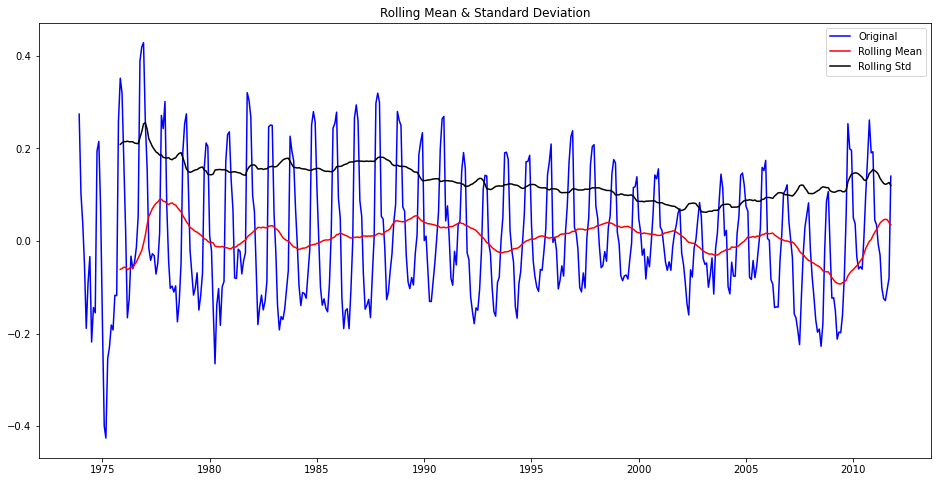

Results of Dickey-Fuller Test:
Test Statistic                -7.456204e+00
p-value                        5.504021e-11
#Lags Used                     1.400000e+01
Number of Observations Used    4.400000e+02
Critical Value (1%)           -3.445300e+00
Critical Value (5%)           -2.868131e+00
Critical Value (10%)          -2.570281e+00
dtype: float64


In [36]:
train_log_moving_avg_diff.dropna(inplace = True)
plt.figure(figsize=(16,8))
test_stationarity(train_log_moving_avg_diff)

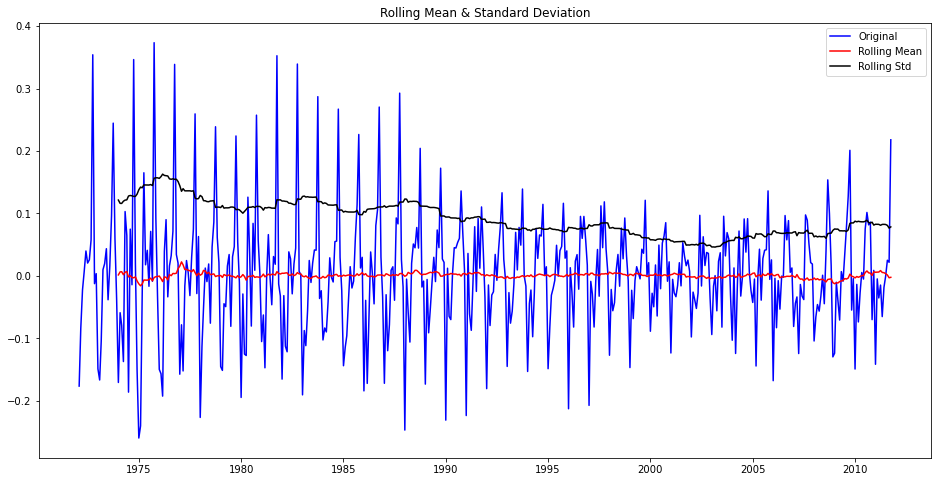

Results of Dickey-Fuller Test:
Test Statistic                -5.732181e+00
p-value                        6.561568e-07
#Lags Used                     1.400000e+01
Number of Observations Used    4.620000e+02
Critical Value (1%)           -3.444584e+00
Critical Value (5%)           -2.867816e+00
Critical Value (10%)          -2.570113e+00
dtype: float64


In [37]:
train_log_diff = train_log - train_log.shift(1)
plt.figure(figsize=(16,8))
test_stationarity(train_log_diff.dropna())

Removing Seasonality

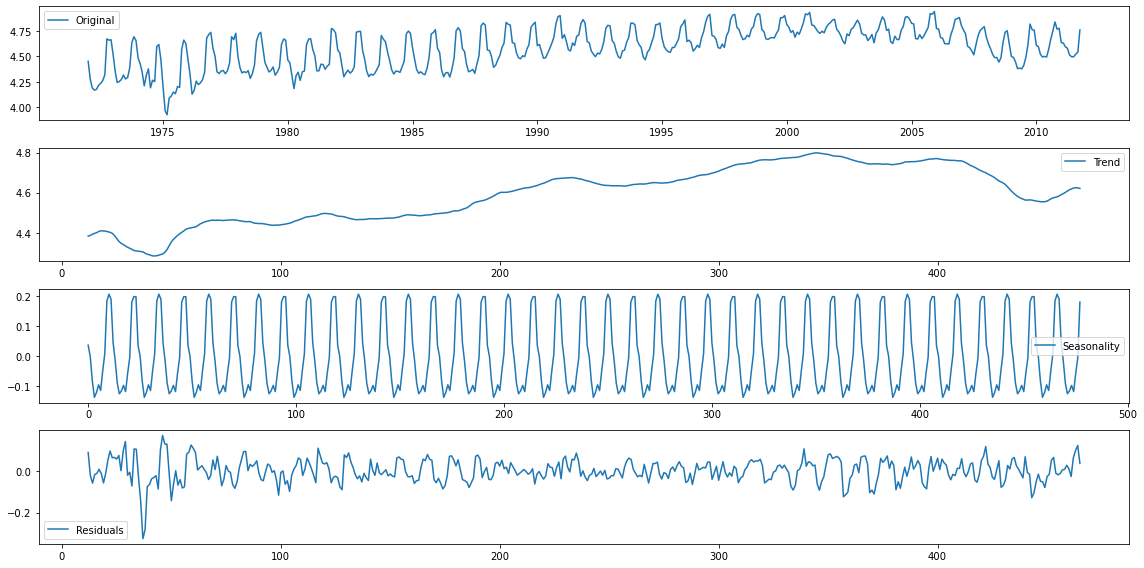

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(train_log).IPG3113N.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

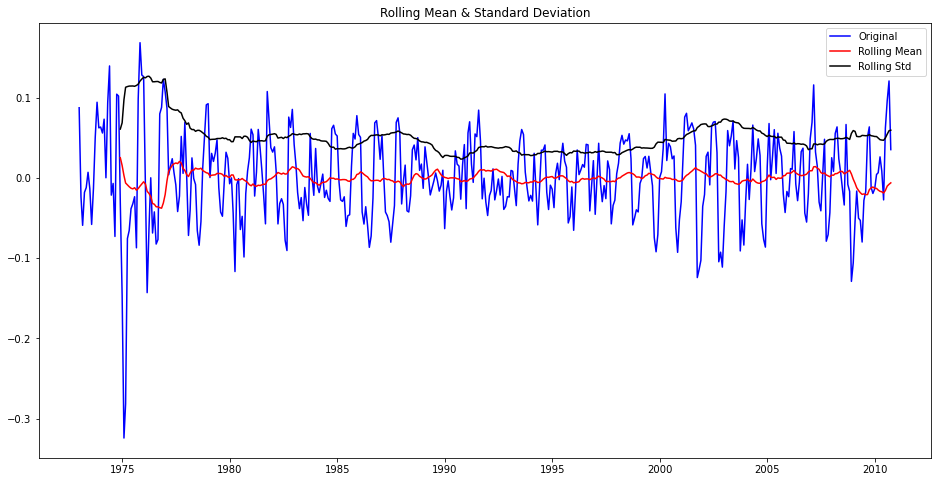

Results of Dickey-Fuller Test:
Test Statistic                -8.590111e+00
p-value                        7.325003e-14
#Lags Used                     1.400000e+01
Number of Observations Used    4.390000e+02
Critical Value (1%)           -3.445334e+00
Critical Value (5%)           -2.868146e+00
Critical Value (10%)          -2.570289e+00
dtype: float64


In [39]:
#Let’s check stationarity of residuals.

train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
plt.figure(figsize=(16,8))
test_stationarity(train_log_decompose[0])

Forecasting the time series using ARIMA

- First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

- To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

- ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

- PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

In [40]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

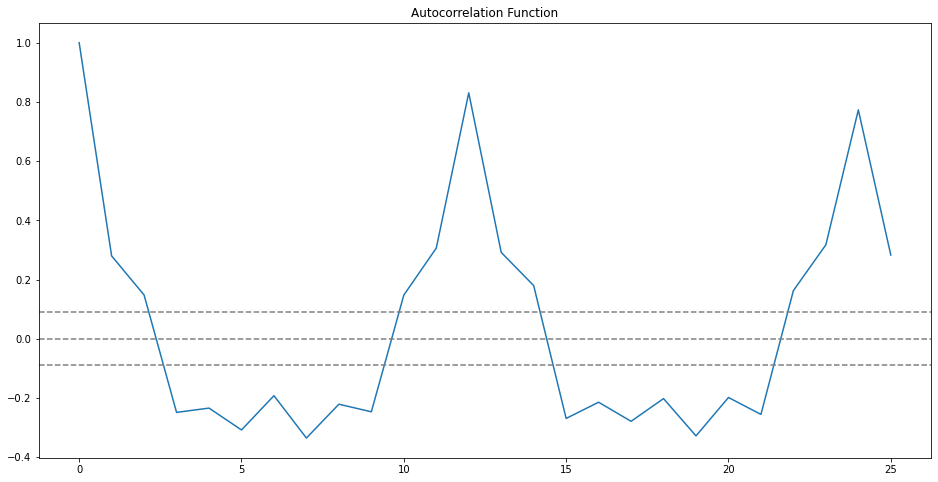

In [41]:
# ACF plot
plt.figure(figsize=(16,8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

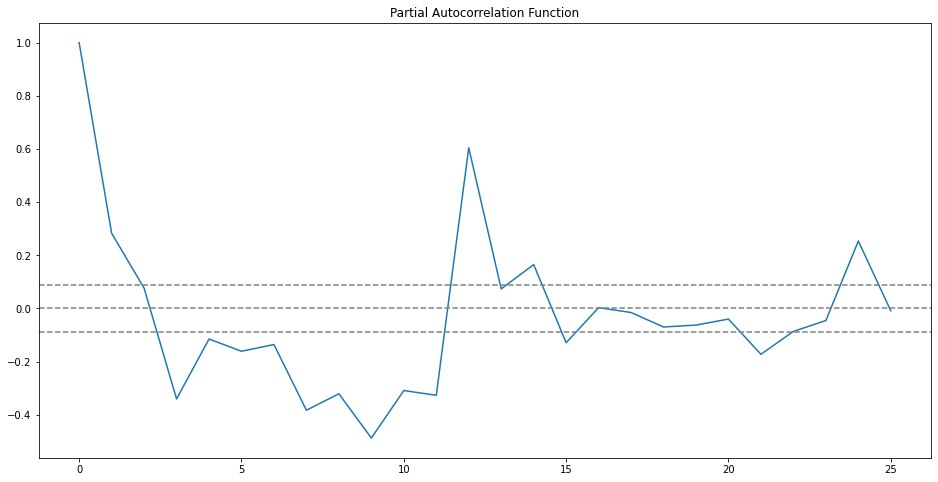

In [42]:
# PACF plot
plt.figure(figsize=(16,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

AR model :-

The autoregressive model specifies that the output variable depends linearly on its own previous values.

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


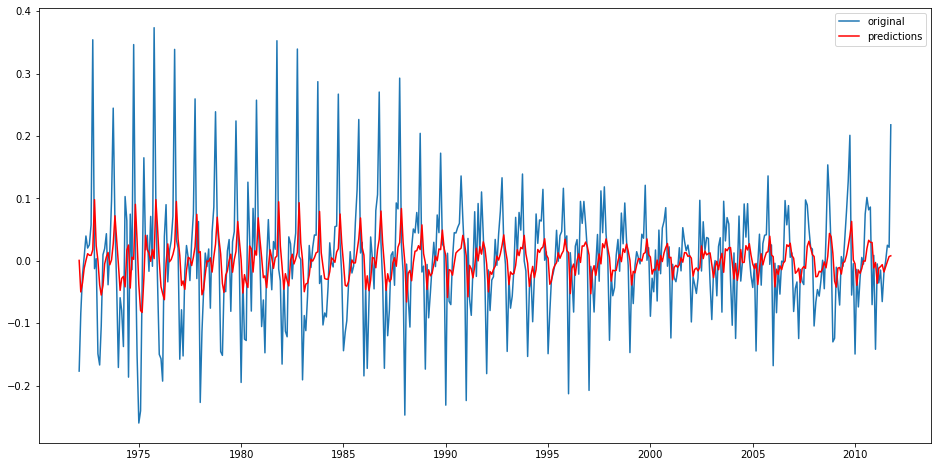

In [43]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(16,8))
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

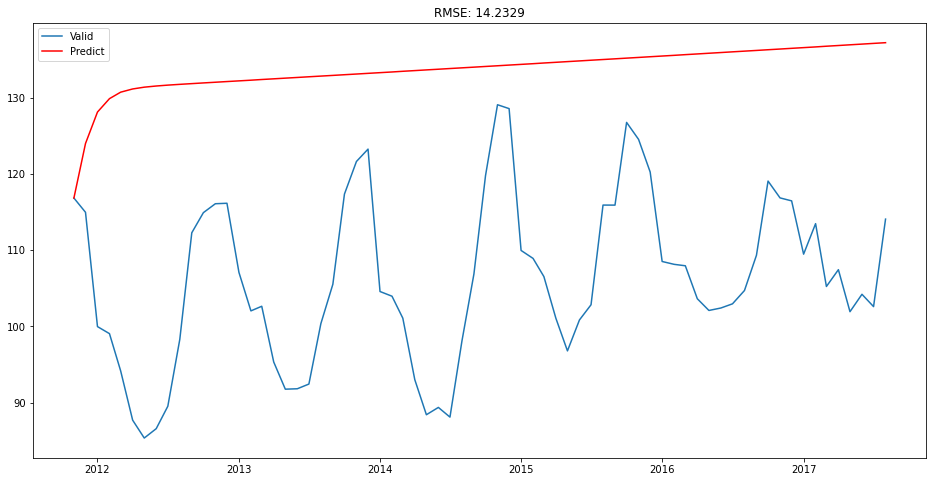

In [44]:
# First step would be to store the predicted results as a separate series and observe it.
AR_predict=results_AR.predict(start="2011-11-01", end="2017-08-01")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['IPG3113N'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

plt.figure(figsize=(16,8))
plt.plot(valid['IPG3113N'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['IPG3113N']))/valid.shape[0]))
plt.show()

MA model :-

The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


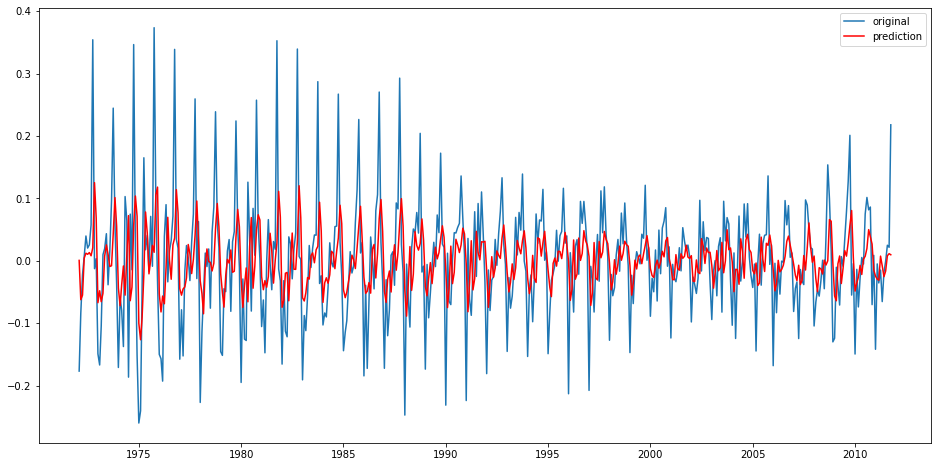

In [45]:
model = ARIMA(train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)
plt.figure(figsize=(16,8))
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

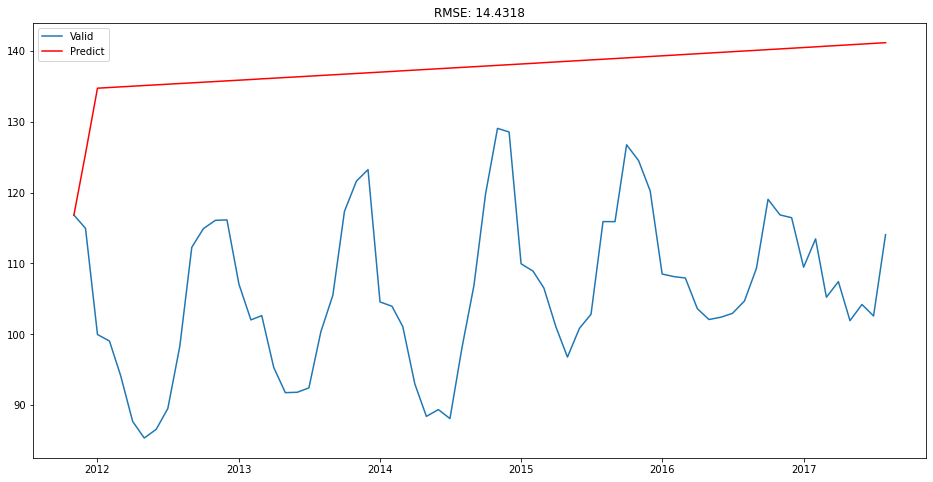

In [46]:
MA_predict=results_MA.predict(start="2011-11-01", end="2017-08-01")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['IPG3113N'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

plt.figure(figsize=(16,8))
plt.plot(valid['IPG3113N'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['IPG3113N']))/valid.shape[0]))
plt.show()

Combined model :-

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


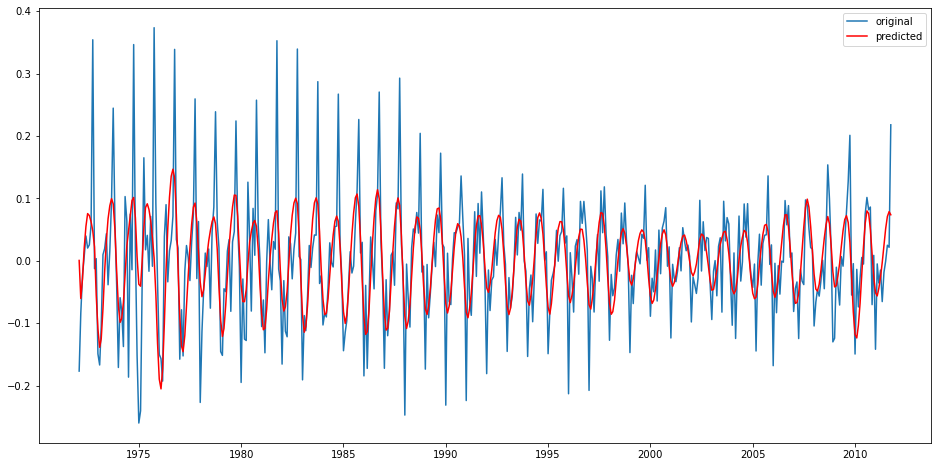

In [47]:
model = ARIMA(train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(16,8))
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [48]:
# Let’s define a function which can be used to change the scale of the model to the original scale.

def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['IPG3113N'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.figure(figsize=(16,8))
    plt.plot(given_set['IPG3113N'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['IPG3113N']))/given_set.shape[0]))
    plt.show()

In [49]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.figure(figsize=(16,8))
    plt.plot(given_set['IPG3113N'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['IPG3113N']))/given_set.shape[0]))
    plt.show()

Let’s predict the values for validation set.

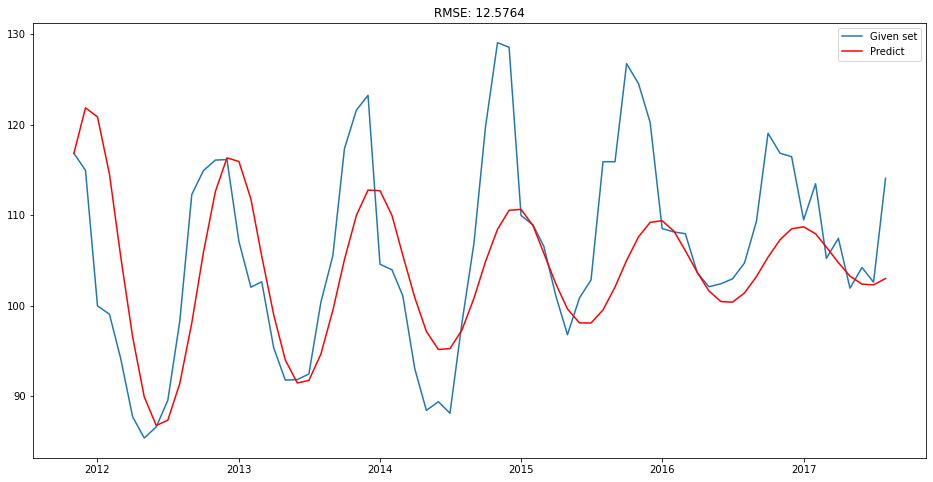

In [50]:
ARIMA_predict_diff=results_ARIMA.predict(start="2011-11-01", end="2017-08-01")

check_prediction_diff(ARIMA_predict_diff, valid)

SARIMAX :-
    
SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series.

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


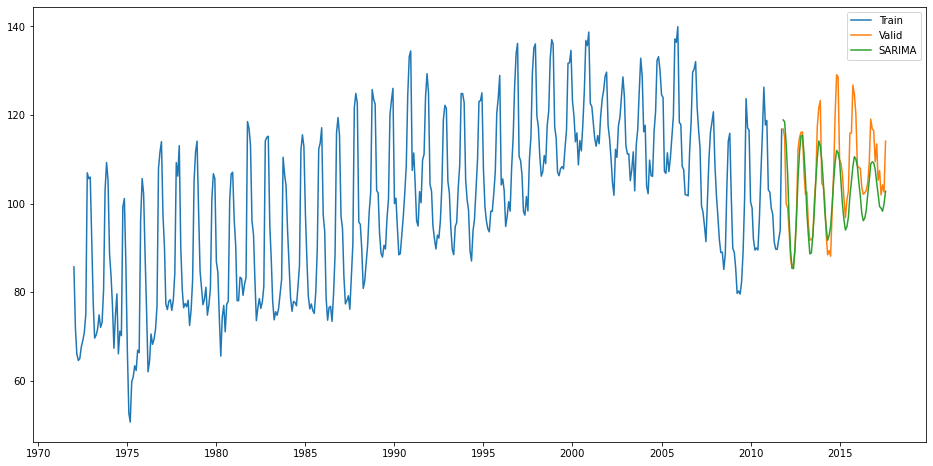

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y_hat_avg = valid.copy()
fit1 = SARIMAX(train['IPG3113N'], order=(2, 1, 4),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False).fit()
y_hat_ex['SARIMA'] = fit1.predict(start="2011-11-01", end="2017-08-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['IPG3113N'], label='Train')
plt.plot(valid['IPG3113N'], label='Valid')
plt.plot(y_hat_ex['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [52]:
# Let’s check the rmse value for the validation part.

rms = sqrt(mean_squared_error(valid['IPG3113N'], y_hat_ex.SARIMA))
print(rms)

6.853417395073527
